In [26]:
###Regression


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [17]:


df = pd.read_csv("C:\\Users\\ajayk\\OneDrive\\Desktop\\MCA\\kc_house_data.csv")


In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21611.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540182.16,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.40,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367362.23,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.13,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


C:\Users\ajayk\AppData\Local\Temp\ipykernel_3456\1453438802.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_correlations=df.corr()


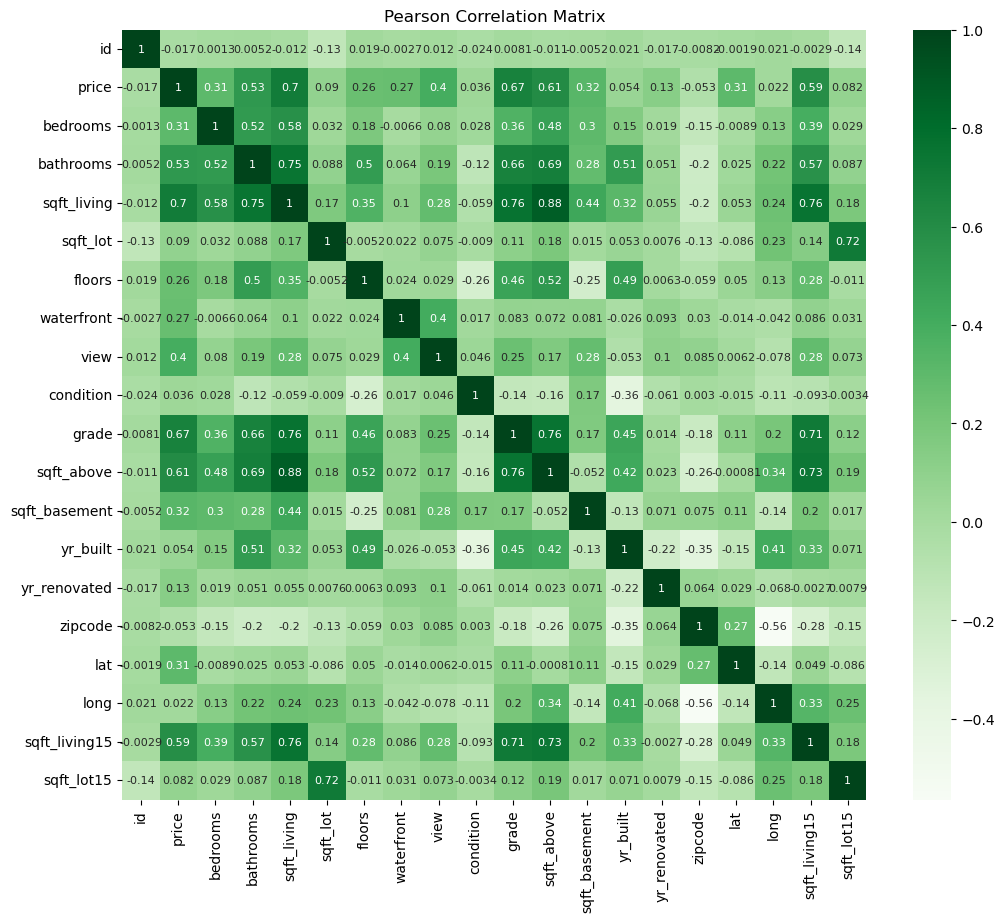

In [24]:
##Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(12,10))
new_correlations=df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size':8})
plt.title('Pearson Correlation Matrix')
plt.show()


In [27]:
### Determine the heighest intercorrelations
highly_correlated_features=new_correlations[new_correlations>0.75]
highly_correlated_features.fillna('-')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
price,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,-,1.0,0.754665,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
sqft_living,-,-,-,0.754665,1.0,-,-,-,-,-,0.762704,0.876644,-,-,-,-,-,-,0.75642,-
sqft_lot,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-
floors,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-
view,-,-,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-
condition,-,-,-,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-


In [28]:
# Importing the packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [29]:
#Read the house price dataset and click for numm data
data = pd.read_csv("C:\\Users\\ajayk\\OneDrive\\Desktop\\MCA\\kc_house_data.csv")
data.isnull().sum()
data.drop(['sqft_above'], axis='columns', inplace=True)
conv_dates=[1 if values==2014 else 0 for values in data.date]
data['date']=conv_dates

In [30]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,0,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,0,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,0,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
#convert any string data  to numerical data using suitable conversion
#identify dependent(output) variable and independent (input) varibale
y=data[['price']].values
x=data.drop(['id','price'],axis=1).values

In [34]:
#split the data into train and test data
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

In [35]:
#define and train(fit) the linear regression model using training data
#model training
LR=LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [37]:
#Test (predict) the output for the test data using the fitted model
y_predict=LR.predict(x_test)
print(y_predict)
print(y_test)

[[219907.72182571]
 [843876.44610343]
 [170313.47916673]
 ...
 [570702.25520194]
 [354493.47463078]
 [955326.74090128]]
[[ 223000.]
 [ 615000.]
 [ 245000.]
 ...
 [ 597500.]
 [ 452500.]
 [1330000.]]


In [38]:
# Define the performance of the model using suitable metric
print ('Coefficient of determination %.3f' %r2_score(y_test,y_predict))

Coefficient of determination 0.702
